In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2018/fer20131.csv
/kaggle/input/fer2018/README
/kaggle/input/fer2018/fer2013.bib
/kaggle/input/fer2018/ferSubmission.csv
/kaggle/input/fer2013/fer2013.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Bidirectional,AveragePooling2D, LSTM, Reshape ,Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [3]:
data = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')

In [4]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [5]:
x_data = data['pixels']
y_data = data['emotion']

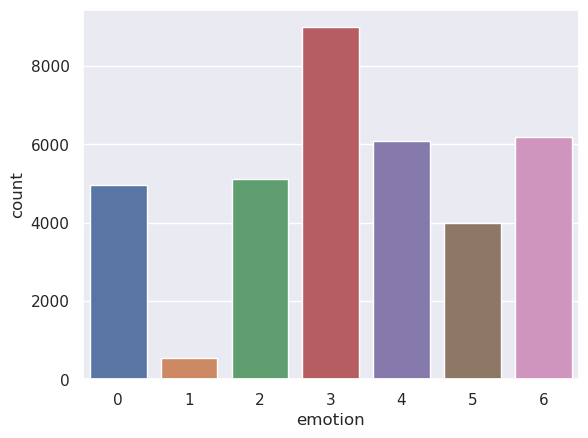

In [6]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [7]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [8]:
y_data.value_counts()

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [9]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    228 216 155 127 119 122 111 125 96 154 126 127...
62919    235 235 235 236 238 238 238 238 238 230 87 31 ...
62920    233 233 232 232 231 231 231 231 231 231 231 23...
62921    81 81 82 79 74 65 49 33 24 22 21 20 22 19 24 2...
62922    105 111 113 103 110 148 157 147 128 144 152 14...
Length: 62923, dtype: object

In [10]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [11]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [12]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 45)

In [14]:
x_train.shape


(47192, 48, 48, 1)

In [15]:
x_test.shape

(15731, 48, 48, 1)

In [16]:
model = Sequential([
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, (3,3), strides=(2,2), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Reshape((-1,128)),
    Bidirectional(LSTM(128)),
#     (Reshape((-1,64))),
#     LSTM(64),
#     (Reshape((-1,64)))
#     (LSTM(32))    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
#     Dropout(0.3)
    Dense(7,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

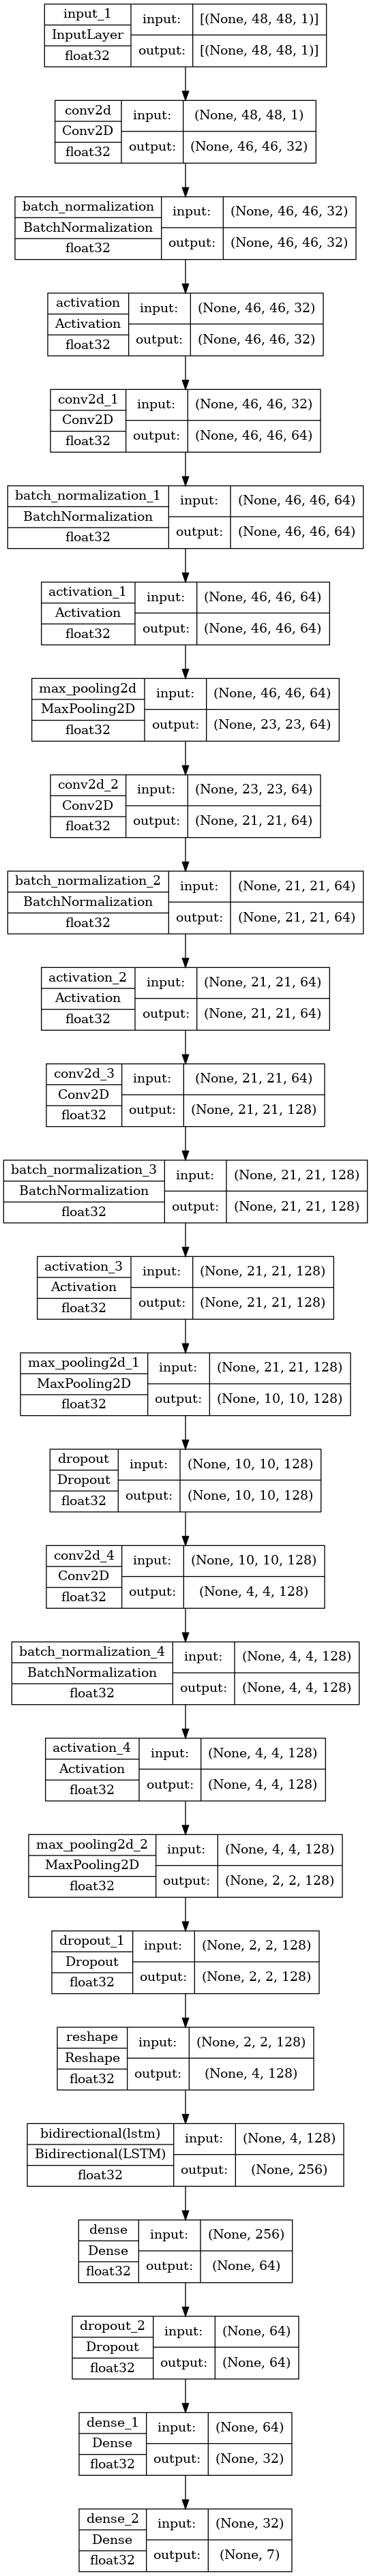

In [17]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [18]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(47192, 7)

In [20]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(15731, 7)

In [21]:
history = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
1475/1475 [==============================] - 29s 13ms/step - loss: 1.8524 - accuracy: 0.2430 - val_loss: 1.8727 - val_accuracy: 0.2611
Epoch 2/50
1475/1475 [==============================] - 18s 12ms/step - loss: 1.6031 - accuracy: 0.3815 - val_loss: 1.5037 - val_accuracy: 0.4196
Epoch 3/50
1475/1475 [==============================] - 19s 13ms/step - loss: 1.4438 - accuracy: 0.4492 - val_loss: 1.2627 - val_accuracy: 0.5180
Epoch 4/50
1475/1475 [==============================] - 19s 13ms/step - loss: 1.3357 - accuracy: 0.4859 - val_loss: 1.2806 - val_accuracy: 0.5084
Epoch 5/50
1475/1475 [==============================] - 18s 12ms/step - loss: 1.2556 - accuracy: 0.5171 - val_loss: 1.2359 - val_accuracy: 0.5298
Epoch 6/50
1475/1475 [==============================] - 19s 13ms/step - loss: 1.2012 - accuracy: 0.5367 - val_loss: 1.0973 - val_accuracy: 0.5639
Epoch 7/50
1475/1475 [==============================] - 18s 12ms/step - loss: 1.1584 - accuracy: 0.5497 - val_loss: 1.0742 -

In [22]:
print("Accuracy of our model on validation data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

492/492 [==============================] - 3s 6ms/step - loss: 0.6718 - accuracy: 0.7826
Accuracy of our model on validation data :  78.25948596000671 %


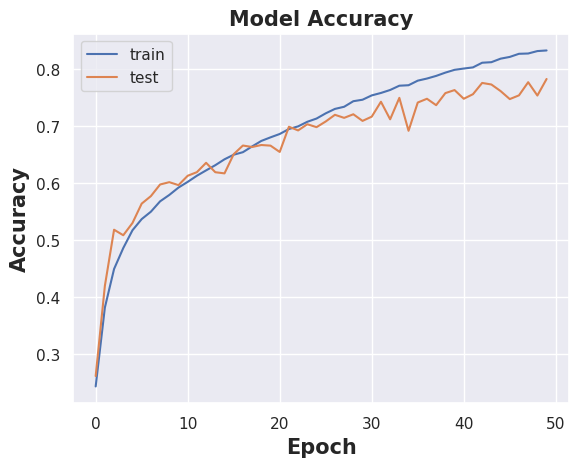

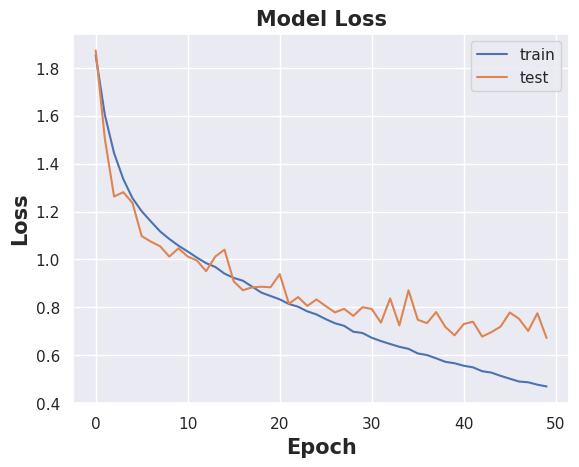

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.title('Model Accuracy', fontsize = 15, fontweight=1000)
plt.ylabel('Accuracy', fontsize = 15, fontweight=700)
plt.xlabel('Epoch', fontsize = 15, fontweight=700)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.title('Model Loss', fontsize = 15, fontweight=1000)
plt.ylabel('Loss', fontsize = 15, fontweight=700)
plt.xlabel('Epoch', fontsize = 15, fontweight=700)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

492/492 [==============================] - 3s 4ms/step


[4, 5, 3, 6, 1, 0, 3, 4, 1, 6]

In [25]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2187
           1       0.98      1.00      0.99      2234
           2       0.73      0.61      0.66      2190
           3       0.78      0.82      0.80      2316
           4       0.63      0.64      0.63      2296
           5       0.88      0.93      0.90      2254
           6       0.69      0.71      0.70      2254

    accuracy                           0.78     15731
   macro avg       0.78      0.78      0.78     15731
weighted avg       0.78      0.78      0.78     15731



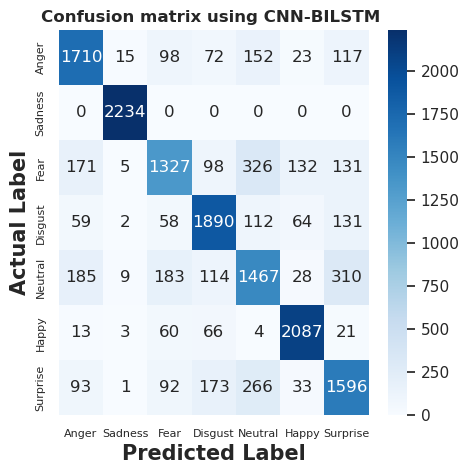

In [27]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

# plt.figure(figsize = (5, 4))
# sn.heatmap(cm, annot = True, fmt = 'd',cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (5,5))
ax = plt.axes()
sn.heatmap(cm,cmap="Blues", annot = True, fmt = 'd')
ax.xaxis.set_ticklabels([  "Anger", "Sadness", "Fear", "Disgust", "Neutral","Happy","Surprise"], fontsize=8);
ax.yaxis.set_ticklabels([  "Anger", "Sadness", "Fear", "Disgust", "Neutral","Happy","Surprise"],  fontsize=8);

plt.title('Confusion matrix using CNN-BILSTM ', fontsize = 12, fontweight=1000)
plt.xlabel('Predicted Label', fontsize = 15, fontweight=1000)
plt.ylabel('Actual Label', fontsize = 15, fontweight=1000)


plt.savefig("confusion")

In [28]:
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save("model.h5") 

In [29]:
print(y_pred)
y_test =  np.argmax(y_test,axis=1)
predict_x = model.predict(x_test)
# Y_Pred = np.argmax(predict_x,axis=1)
print(predict_x[:,2])

[[2.1267766e-02 2.7623389e-06 2.4655654e-01 ... 5.6678033e-01
  8.1513764e-04 1.6316456e-01]
 [1.2918057e-05 2.3415135e-08 5.9111910e-03 ... 3.7171500e-05
  9.9371618e-01 2.7059650e-04]
 [1.3032719e-01 5.3621675e-06 2.9453722e-01 ... 1.4481982e-03
  2.2865359e-01 2.7557532e-04]
 ...
 [6.7873305e-01 3.9362887e-04 3.1331722e-02 ... 2.5626791e-01
  9.9842669e-05 1.7389676e-02]
 [4.4379512e-06 1.3212503e-09 1.1864573e-03 ... 7.5816143e-07
  9.9874914e-01 2.6309215e-06]
 [2.0199634e-02 4.4859142e-05 9.3648875e-01 ... 2.6593354e-02
  3.4936804e-03 9.4068358e-03]]
492/492 [==============================] - 2s 4ms/step
[0.24655654 0.00591119 0.29453722 ... 0.03133172 0.00118646 0.93648875]


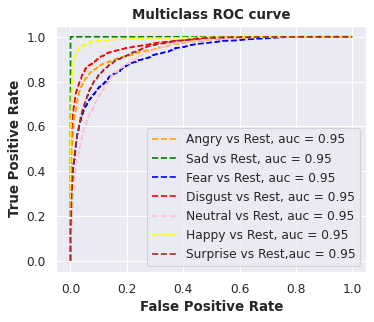

In [30]:
### ROC Curve
# roc curve for classes
from sklearn import metrics
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(y_test,y_prob_pred_cnb,multi_class='ovr',average='weighted')
    
plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('CNN_LSTM_Multiclass_ROC.png',dpi=80);    